In [1]:
import pandas as pd
import os
import copy
import matplotlib.pyplot as plt
import numpy as np
import csv
import seaborn as sns
import itertools
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde
from matplotlib import cm
import pypalettes
from matplotlib.colors import Normalize
from visualization import *
plt.rcParams['font.family'] = 'Times New Roman'

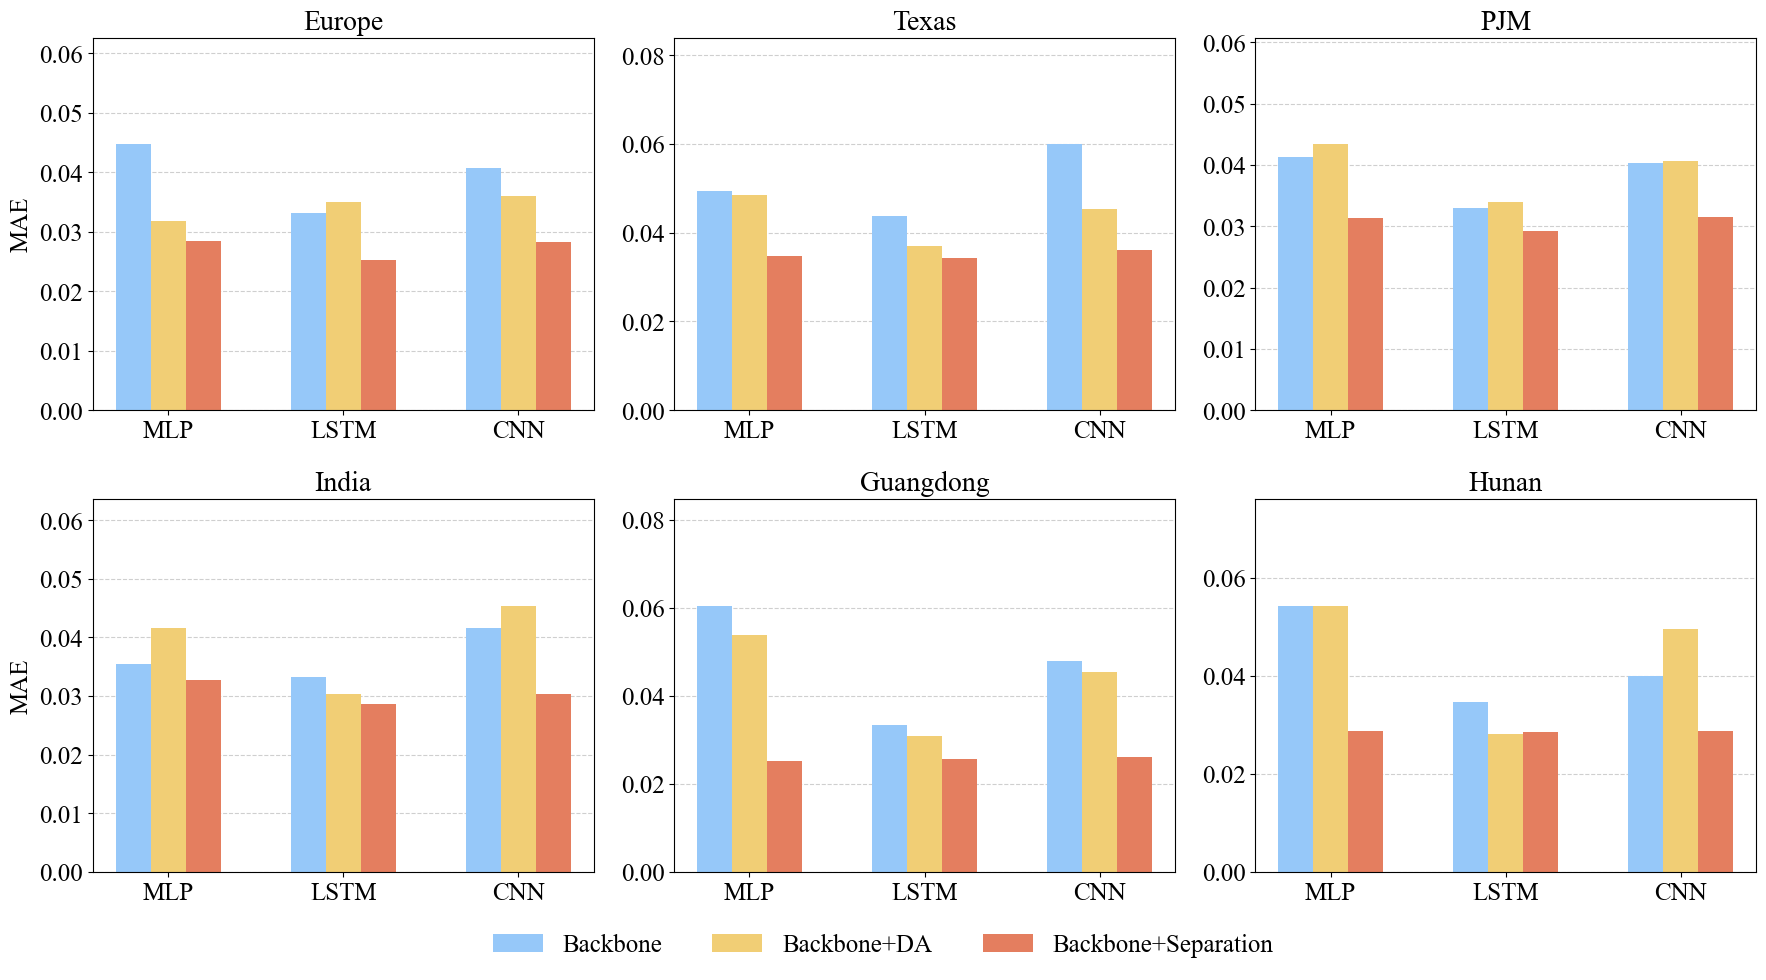

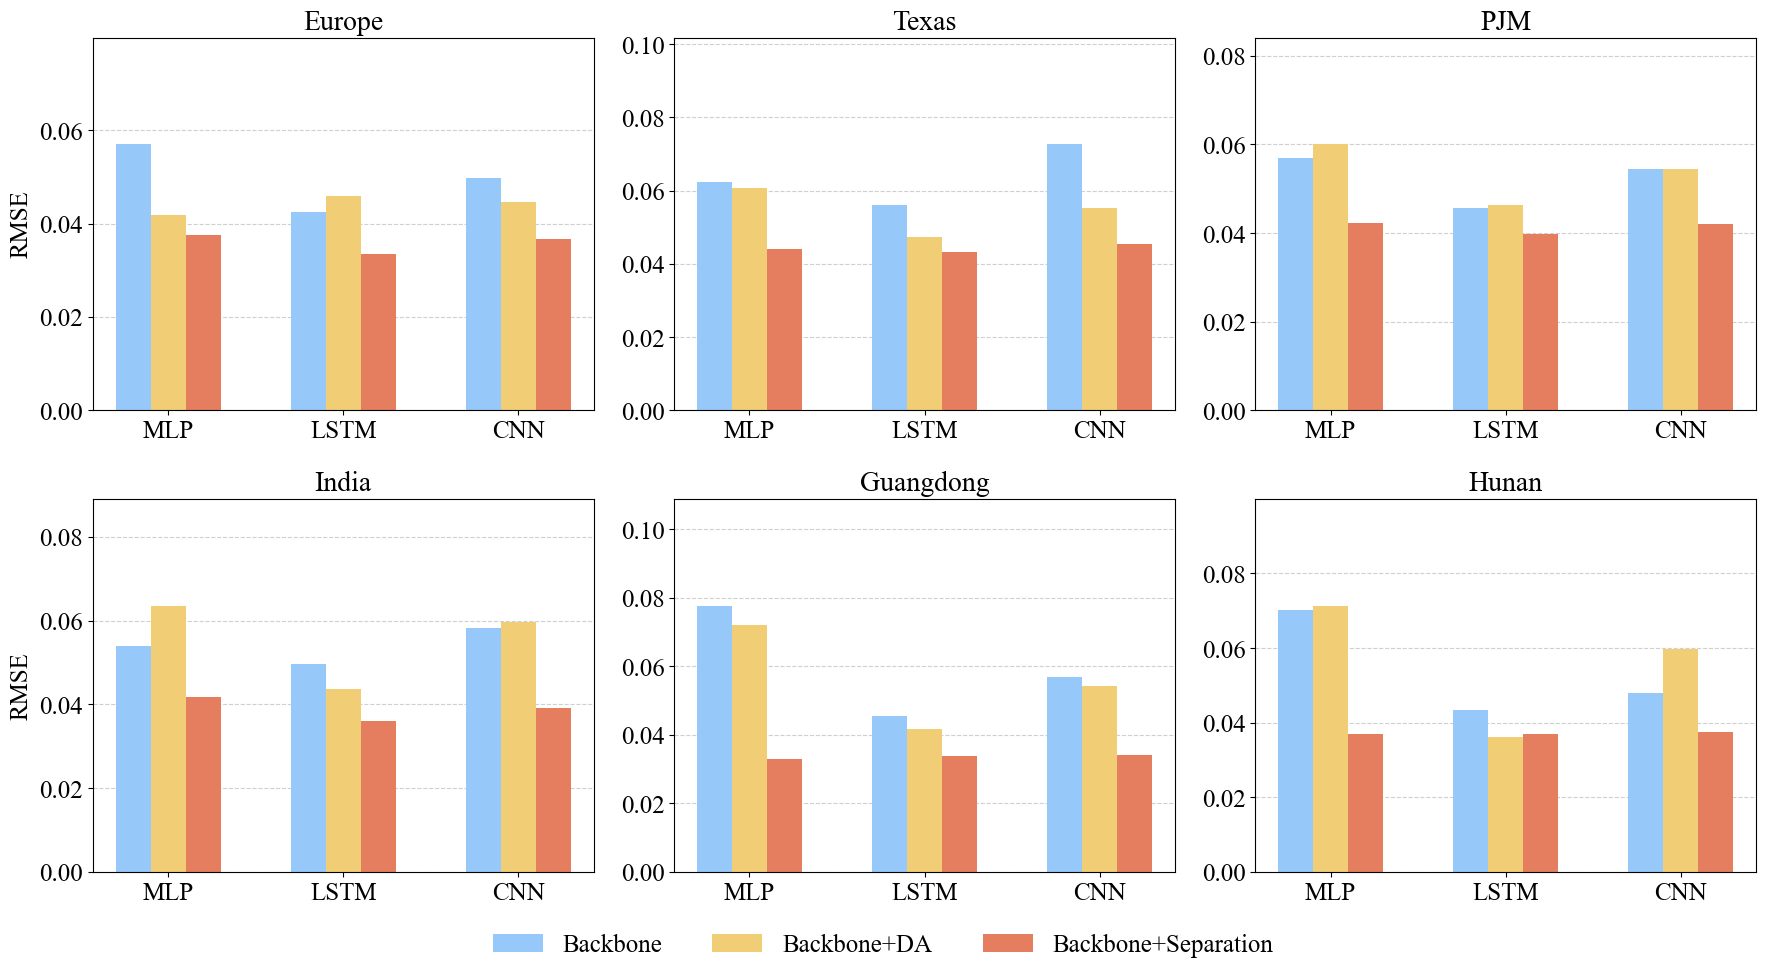

In [18]:
def ablation_figure_multi(sheet_name_list, title_list,metric='MAE'):
    font_size=18
    import matplotlib
    matplotlib.rcParams.update({
        'font.size': font_size,           # 全局字体大小
        'axes.titlesize': font_size+2,    # 子图标题
        'axes.labelsize': font_size,      # 坐标轴标题
        'xtick.labelsize': font_size,     # x轴刻度
        'ytick.labelsize': font_size,     # y轴刻度
        'legend.fontsize': font_size,     # 图例     # 图表标题
    })
    Model = ['MLP', 'LSTM', 'CNN']
    Setting = ['+Separation', '', '+DA']
    label_list = [ 'Backbone', 'Backbone+DA','Backbone+Separation']
    color_list = ["#96C8F9", "#F1CE75", "#E47E5F"]

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()

    for idx, sheet_name in enumerate(sheet_name_list):
        data = pd.read_excel('../极端温度实验结果.xlsx', sheet_name=sheet_name)
        cols = ['Country']
        combined = []
        for model in Model:
            for setting in Setting:
                if setting == '':
                    combined.append(model)
                else:
                    combined.append(f"{model}{setting}")
        combined = [f"{i}_{metric}" for i in combined for metric in ['MAE', 'RMSE']]
        cols = cols + combined
        data.columns = cols
        data = data.iloc[1:].reset_index(drop=True)
        MAE_col = [col for col in data.columns if 'MAE' in col]
        var_MAE_value = np.var(data.iloc[:-1][MAE_col], axis=0).to_numpy()
        MAE_col =['MLP_MAE','MLP+DA_MAE','MLP+Separation_MAE',
                  'LSTM_MAE','LSTM+DA_MAE','LSTM+Separation_MAE',
                 'CNN_MAE','CNN+DA_MAE','CNN+Separation_MAE']

        RMSE_col = ['MLP_RMSE','MLP+DA_RMSE','MLP+Separation_RMSE',
                    'LSTM_RMSE','LSTM+DA_RMSE','LSTM+Separation_RMSE',
                    'CNN_RMSE','CNN+DA_RMSE','CNN+Separation_RMSE']
        
        #MAE_col=[col for col in data.columns if 'MAE' in col]
        #RMSE_col = [col for col in data.columns if 'RMSE' in col]

        col_for_draw= MAE_col if metric == 'MAE' else RMSE_col


        
        min_value = np.min(data.iloc[:-1][col_for_draw],axis=0).to_numpy().reshape(3, 3)
        max_value = np.max(data.iloc[:-1][col_for_draw],axis=0).to_numpy().reshape(3, 3)
        
        # var_MAE_value = np.var(data.iloc[:-1][MAE_col], axis=0).to_numpy()#.reshape(3, 3)
        mean_value = np.mean(data.iloc[:-1][col_for_draw], axis=0).to_numpy()#.reshape(3, 3)
        # min_MAE_value = mean_MAE_value - np.sqrt(list(var_MAE_value))
        # max_MAE_value = mean_MAE_value + np.sqrt(list(var_MAE_value))
        
        mean_value= mean_value.reshape(3, 3)
        # min_MAE_value= min_MAE_value.reshape(3, 3)
        # max_MAE_value= max_MAE_value.reshape(3, 3)



        x = np.arange(len(Model))
        bar_width = 0.2
        ax = axes[idx]
        for i in range(len(Setting)):
            y = mean_value[:, i]
            ax.bar(x + i * bar_width, y, width=bar_width, capsize=5, label=label_list[i], color=color_list[i])
        ax.yaxis.grid(True, linestyle='--', alpha=0.6, zorder=0)  # 添加横向网格线，zorder=0保证在bar下方
        for patch in ax.patches:
            patch.set_zorder(2)  # 柱子zorder调高，确保在网格线上方
            # yerr = np.vstack([
            #     y - min_value[:, i],
            #     max_value[:, i] - y
            # ])
            #ax.bar(x + i * bar_width, y, width=bar_width, yerr=yerr, capsize=5, label=label_list[i], color=color_list[i])
           # ax.bar(x + i * bar_width, y, width=bar_width, capsize=5, label=label_list[i], color=color_list[i])
        center = x + bar_width * (len(Setting) - 1) / 2
        ax.set_xticks(center)
        ax.set_xticklabels(Model)
        ax.set_title(title_list[idx])
        ax.set_ylim(0, 1.4 * np.max(mean_value))
        if idx % 3 == 0:
            ax.set_ylabel(metric)
        #ax.legend(fontsize=10)
    plt.tight_layout(rect=[0, 0.05, 1, 1])
    # 合并legend到最下方
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=3 ,frameon=False)
    plt.savefig('../figures/ablation_figure_{}.png'.format(metric), bbox_inches='tight', dpi=300)
    plt.show()

# 用法示例
sheet_name_list = [
    '嵌入（欧洲2018寒潮）',
    '嵌入（德州2023热浪）',
    '嵌入（PJM2023热浪）',
    '嵌入（印度2022热浪）',
    '嵌入（广东2023热浪）',
    '嵌入（湖南2023寒潮）'
]

title_list = [
    'Europe',
    'Texas',
    'PJM',
    'India',
    'Guangdong',
    'Hunan'
]
ablation_figure_multi(sheet_name_list,title_list)
ablation_figure_multi(sheet_name_list,title_list,metric='RMSE')

In [ ]:
min_RMSE_value = np.min(data.iloc[:-1][RMSE_col],axis=0).to_numpy().reshape(3, 3)
min_MAE_value = np.min(data.iloc[:-1][MAE_col],axis=0).to_numpy().reshape(3, 3)
max_RMSE_value = np.max(data.iloc[:-1][RMSE_col],axis=0).to_numpy().reshape(3, 3)
max_MAE_value = np.max(data.iloc[:-1][MAE_col],axis=0).to_numpy().reshape(3, 3)

var_RMSE_value = np.var(data.iloc[:-1][RMSE_col], axis=0).to_numpy()#.reshape(3, 3)
var_MAE_value = np.var(data.iloc[:-1][MAE_col], axis=0).to_numpy()#.reshape(3, 3)
mean_RMSE_value = np.mean(data.iloc[:-1][RMSE_col], axis=0).to_numpy()#.reshape(3, 3)
mean_MAE_value = np.mean(data.iloc[:-1][MAE_col], axis=0).to_numpy()#.reshape(3, 3)
min_MAE_value = mean_MAE_value - np.sqrt(list(var_MAE_value))
max_MAE_value = mean_MAE_value + np.sqrt(list(var_MAE_value))
min_RMSE_value = mean_RMSE_value - np.sqrt(list(var_RMSE_value))
max_RMSE_value = mean_RMSE_value + np.sqrt(list(var_RMSE_value))
min_MAE_value= min_MAE_value.reshape(3, 3)
max_MAE_value= max_MAE_value.reshape(3, 3)
min_RMSE_value= min_RMSE_value.reshape(3, 3)
max_RMSE_value= max_RMSE_value.reshape(3, 3)


In [4]:
MAE_col

NameError: name 'MAE_col' is not defined

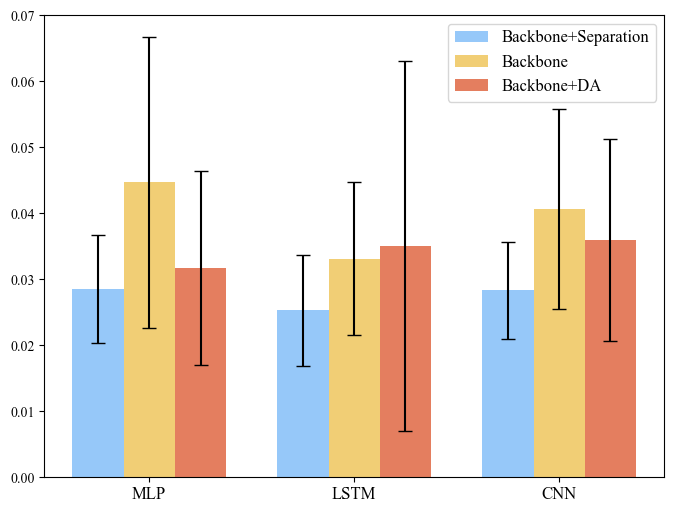

In [77]:

x = np.arange(len(Model))
bar_width = 0.25
label_list=['Backbone+Separation','Backbone','Backbone+DA']
color_list=["#E47E5F","#F1CE75","#30AB9D"]
#color_list=['#EA8379','#7DAEE0',"#CA80E8"]
color_list = ["#96C8F9","#F1CE75","#E47E5F"]
plt.figure(figsize=(8, 6))

for i in range(len(Setting)):
    y = MAE_value[:, i]
    yerr = np.vstack([
        y - min_MAE_value[:, i],   # 下界
        max_MAE_value[:, i] - y    # 上界
    ])
    plt.bar(x + i*bar_width, y, width=bar_width, yerr=yerr, capsize=5, label=label_list[i], color=color_list[i])
center = x + bar_width * (len(Setting) - 1) / 2
plt.xticks(center, Model, fontsize=12)
plt.legend(fontsize=12)




In [ ]:
def sample_generation_3D():
    country = 'COAST'
    data = pd.read_excel('../Data/reformed_data_updated/Texas_reformed_data/{}.xlsx'.format(country))
    start_date = pd.to_datetime('2021/01/01/00')
    end_date = pd.to_datetime('2024/12/31/23')
    data = data[(pd.to_datetime(data['Data_Hour']) >= start_date) & (pd.to_datetime(data['Data_Hour']) <= end_date)]
    load = np.array(data['Load']) / 25000
    temperature = np.array(data['Temperature']) / 40

    T_i_list = np.array([np.mean(temperature[24 * i:24 * (i + 1)])
                         for i in range(temperature.shape[0] // 24)])
    load_i_list = np.array([np.max(load[24 * i:24 * (i + 1)])
                            for i in range(temperature.shape[0] // 24)])

    # print('load_i_list shape:', load_i_list.shape)
    # print('T_i_list shape:', T_i_list.shape)
    # # define the coldwave index
    load_draw= np.array([np.mean(load_i_list[i + 30:i + 30 + 3]) for i in range(load_i_list.shape[0] - 3 - 30)])
    T_draw = np.array([np.mean(T_i_list[i + 30:i + 30 + 3]) for i in range(T_i_list.shape[0] - 3 - 30)])
    print('load_draw shape:', load_draw.shape)
    T_05 = np.percentile(T_i_list, 5)
    ECI_sig = np.array([np.mean(T_i_list[i + 30:i + 30 + 3]) - T_05
                        for i in range(T_i_list.shape[0] - 3 - 30)])
    ECI_accl = np.array([np.mean(T_i_list[i + 30:i + 30 + 3]) - np.mean(T_i_list[i:i + 30])
                         for i in range(T_i_list.shape[0] - 3 - 30)])
    ECF = np.array([min(0, -ECI_sig[i] * min(-1, ECI_accl[i])) for i in range(ECI_sig.shape[0])])

    # define the heatwave index
    T_95 = np.percentile(T_i_list, 95)
    EHI_sig = np.array([np.mean(T_i_list[i + 30:i + 30 + 3]) - T_95
                        for i in range(T_i_list.shape[0] - 3 - 30)])
    EHI_accl = np.array([np.mean(T_i_list[i + 30:i + 30 + 3]) - np.mean(T_i_list[i:i + 30])
                         for i in range(T_i_list.shape[0] - 3 - 30)])
    EHF = np.array([max(0, EHI_sig[i] * max(1, EHI_accl[i])) for i in range(EHI_sig.shape[0])])
    print('ECF:', ECF.shape, 'EHF:', EHF.shape)
    EHF=EHF.reshape(-1, 1)
    ECF=ECF.reshape(-1, 1)
    
    for i in range(ECI_sig.shape[0]):
        if ECF[i] != 0 and EHF[i] != 0:
            print('Both ECF and EHF are non-zero at index:', i)
    cooling_data= []
    heat_data = []
    for i in range(ECF.shape[0]):
        if ECF[i] != 0:
            cooling_data.append([ T_draw[i],load_draw[i], -0.5])
    for i in range(EHF.shape[0]):
        if EHF[i] != 0:
            heat_data.append([T_draw[i],load_draw[i], -0.5])

    return heat_data,cooling_data


In [ ]:
heat_data, cooling_data = sample_generation_3D()

In [ ]:

def extreme_distribution_surface():
    country = 'COAST'
    data = pd.read_excel('../Data/reformed_data_updated/Texas_reformed_data/{}.xlsx'.format(country))
    start_date = pd.to_datetime('2021/01/01/00')
    end_date = pd.to_datetime('2024/12/31/23')
    data = data[(pd.to_datetime(data['Data_Hour']) >= start_date) & (pd.to_datetime(data['Data_Hour']) <= end_date)]

    load = np.array(data['Load'])/25000
    temperature = np.array(data['Temperature'])/40

    T_i_list = np.array([np.mean(temperature[24 * i:24 * (i + 1)])
                         for i in range(temperature.shape[0] // 24)])
    load_i_list = np.array([np.max(load[24 * i:24 * (i + 1)])
                            for i in range(temperature.shape[0] // 24)])

    # 使用核密度估计计算概率密度
    xy = np.vstack([T_i_list, load_i_list])
    kde = gaussian_kde(xy)

    # 创建网格以评估密度
    x_grid = np.linspace(0, 40, 100)/40
    y_grid = np.linspace(5000, 30000, 100)/25000
    x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)
    z_mesh = kde(np.vstack([x_mesh.ravel(), y_mesh.ravel()])).reshape(x_mesh.shape)

    # 创建一个 3D 图形
    fig = plt.figure(figsize=(6, 5))
    fig.patch.set_facecolor('white')
    ax = fig.add_subplot(111, projection='3d')
    ax.set_facecolor('white')
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    # 绘制透明曲面图
    ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap='viridis', alpha=0, edgecolor='none')

    # 定义渐变颜色映射
    #cmap = cm.get_cmap("plasma")  # 从紫色到黄色的渐变
    cmap = pypalettes.load_cmap("Bmsurface")
    #cmap = pypalettes.load_cmap("BuRd")
    #cmap = pypalettes.load_cmap("wailord")

    # 绘制等势线（每个温度对应一条线）
    for i, temp in enumerate(np.linspace(-5, 45, 50)/40):
        z_value = kde(np.vstack([temp * np.ones_like(y_grid), y_grid.ravel()])).reshape(y_grid.shape)
        color = cmap(abs((50/2-i) / 25))  # 使用渐变颜色
        ax.plot(np.full_like(y_grid, temp), y_grid, z_value, color=color, linewidth=1.5)
    # 设置标签
    ax.set_xlabel('Normalized Temperature', fontsize=12, labelpad=13)
    ax.set_ylabel('Normalized Load', fontsize=12, labelpad=13)
    ax.set_zlabel('Probability Density', fontsize=12, labelpad=5)
    #ax.set_zticks([])
    #ax.set_xticklabels(ax.get_xticks(), fontsize=11)
    #ax.set_yticklabels(ax.get_yticks(), fontsize=11)
    #ax.set_zticklabels(ax.get_zticks(), fontsize=11)

    # plot arrow
    #ax.quiver(0, 25000, 1e-5, 0, 0, 0.5e-5, color='b', arrow_length_ratio=0.5)

    start_x, start_y, start_z = 0.12, 0.7, 10  # 起点设置为 z=14
    u, v, w = 0, 0, -8  # 方向向量
    #plotArrow3D(ax, start_x, start_y, start_z, u, v, w, arrowLen=0.5, mutation_scale=10, color='darkcyan')
    ax.arrow3D(start_x, start_y, start_z, u, v, w, mutation_scale=10, color='darkcyan', arrowstyle='->', linewidth=2)
    ax.text(start_x+0.2, start_y, start_z + 2, "Coldwaves", color='darkcyan', fontsize=12, fontweight='bold')

    start_x, start_y, start_z = 1, 0.5, 10  # 起点设置为 z=14
    u, v, w = 0.02, 0.56, -8  # 方向向量
    #plotArrow3D(ax, start_x, start_y, start_z, u, v, w, arrowLen=0.5, mutation_scale=10, color='crimson')
    ax.arrow3D(start_x, start_y, start_z, u, v, w, mutation_scale=10, color='crimson', arrowstyle='->', linewidth=2)
    ax.text(start_x + 0.2, start_y, start_z + 2, "Heatwaves", color='crimson', fontsize=12, fontweight='bold')

    # 去掉背景网格
    ax.grid(False)

    norm = Normalize(vmin=-5, vmax=45)
    cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, pad=0, shrink=0.5, aspect=10)
    cbar.ax.text(0.5, 1.05, 'Temperature\nDeviation', ha='center', va='bottom', transform=cbar.ax.transAxes, fontsize=12)

    # 调整视角
    ax.view_init(elev=20, azim=55)
    
    #ax.view_init(elev=20, azim=75)
    heat_data,cooling_data = sample_generation_3D()
    heat_data = np.array(heat_data)
    cooling_data = np.array(cooling_data)
    plt.scatter(heat_data[:, 0], heat_data[:, 1], zs=0, zdir='z', c='crimson', s=10, label='Heatwaves', alpha=0.5)
    #plt.scatter(heat_data[:, 0], heat_data[:, 1], zs=0, zdir='z', c='crimson', s=10, label='Heatwaves', alpha=0.5)
    plt.scatter(cooling_data[:, 0], cooling_data[:, 1], zs=0, zdir='z', c='darkcyan', s=10, label='Coldwaves', alpha=0.5)
    # 显示图形
    #plt.title('3D Surface with Temperature Contours')
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.title('Data Distribution', fontsize=14, fontweight='bold', y=0.8)
    plt.savefig('../figures/extreme_distribution_surface.png', dpi=500, bbox_inches='tight')
    plt.show()


In [ ]:
extreme_distribution_surface()

In [ ]:
extreme_distribution_surface()

In [ ]:
plot_scatter_subplot_guangdong()

In [ ]:
plot_scatter_subplot_hunan()

In [ ]:
plot_scatter_subplot_PJM()

In [ ]:
plot_scatter_subplot_Texas()

In [ ]:
plot_scatter_subplot_Europe()

In [ ]:
plot_scatter_subplot_India()

In [ ]:
#plot_scatter()
#plot_scatter_subplot_guangdong()
#plot_scatter_subplot_PJM()
#plot_scatter_subplot_Texas()
#plot_scatter_subplot_India()
#plot_scatter_subplot_hunan()
#plot_scatter_subplot_Europe()

In [ ]:
plot_bar_subplot_nMAE()
plot_bar_subplot_nRMSE()

In [ ]:
plot_box()

In [ ]:
plot_extreme_boxes()

In [ ]:
extreme_distribution_surface()